In [114]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # puts gridlines in background of plot
tc_voltage = np.linspace(5.95, 4.3, 34)
sc_voltage_012 = [.08,.08,.08,.08,.08,.09,.09,.07,.07,.06,.05,.05,.05,.05,.05,.02,-.02,-.06,-.13,-.24,-.47,-.62,-.69,-.78,-.8,-.82,-.85,-.86,-.87,-.89,-.92,-.90,-.91,-.93]
sc_voltage_021 = [.08,.08,.08,.08,.08,.07,.07,.07,.07,.05,-.02,-.07,-.1,-.14,-.19,-.26,-.42,-.69,-.95,-1.15,-1.27,-1.34,-1.39,-1.43,-1.47,-1.5,-1.52,-1.55,-1.58,-1.62,-1.56,-1.58,-1.62,-1.65]
sc_voltage_033 = [.08,.08,.08,.08,.08,.08,.08,.08,.01,-.03,-.16,-.26,-.35,-.43,-.53,-.61,-.75,-1.03,-1.32,-1.84,-2.38,-2.22,-2.36,-2.43,-2.47,-2.47,-2.53,-2.53,-2.59,-2.64,-2.67,-2.74,-2.77,-2.74]
sc_voltage_042 = [.06,.06,.06,.06,.06,.06,.07,.06,.02,-.1,-.23,-.33,-.44,-.53,-.61,-.69,-.8,-1.03,-1.33,-1.60,-2.,-2.39,-2.61,-2.73,-2.8,-2.77,-2.77,-2.8,-2.86,-2.95,-2.89,-2.90,-2.94,-3.00]
tc_voltage

array([5.95, 5.9 , 5.85, 5.8 , 5.75, 5.7 , 5.65, 5.6 , 5.55, 5.5 , 5.45,
       5.4 , 5.35, 5.3 , 5.25, 5.2 , 5.15, 5.1 , 5.05, 5.  , 4.95, 4.9 ,
       4.85, 4.8 , 4.75, 4.7 , 4.65, 4.6 , 4.55, 4.5 , 4.45, 4.4 , 4.35,
       4.3 ])

Text(0, 0.5, 'Kelvin')

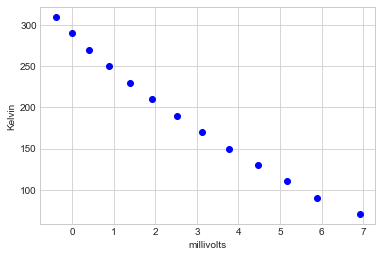

In [115]:
mV = np.array([-0.4, 0, 0.4, 0.89, 1.39, 1.93, 2.52, 3.12, 3.76, 4.46, 5.16, 5.9, 6.92]) # values are from table in Appendix A
Kelvin = np.array([310, 290, 270, 250, 230, 210, 190, 170, 150, 130, 110, 90, 70]) # values are from table in Appendix A

plt.plot(mV, Kelvin, 'bo')
plt.xlabel('millivolts')
plt.ylabel('Kelvin')

In [116]:
#Equations used can be found here: https://www.youtube.com/watch?v=GhrxgbQnEEU

std_mV = (((np.std(mV) ** 2) * len(mV)) / (len(mV) - 1))**0.5 # std_mV is the sample standard deviation
std_Kelvin = (((np.std(Kelvin) ** 2) * len(Kelvin)) / (len(Kelvin) - 1))**0.5 # std_Kelvin is the sample standard deviation

mV_mean = np.mean(mV) # x mean
Kelvin_mean = np.mean(Kelvin) # y mean

r = sum((mV - mV_mean) * (Kelvin - Kelvin_mean)) / (np.sqrt(sum((mV - mV_mean) ** 2) * sum((Kelvin - Kelvin_mean) ** 2)))  

m = r * (std_Kelvin / std_mV)
b = Kelvin_mean - (m * mV_mean)

# BSCCO PROBE - PART C

In [117]:
def mVToKelvin(mV, m, b):
    '''takes the voltage, slope, and y-intercept, and returns the temperature, in Kelvin, corresponding to the given voltage'''
    return m * mV + b

In [129]:
resistance_012 = np.array(sc_voltage_012) / 0.12 # units of milliohms
resistance_021 = np.array(sc_voltage_021) / 0.12 # units of milliohms
resistance_033 = np.array(sc_voltage_033) / 0.12 # units of milliohms
resistance_042 = np.array(sc_voltage_042) / 0.12 # units of milliohms
temperature = [mVToKelvin(item, m, b) for item in tc_voltage]

Text(0.5, 0.98, 'Temperature vs Resistance for BSCCO Probe')

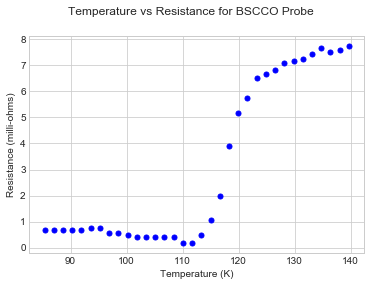

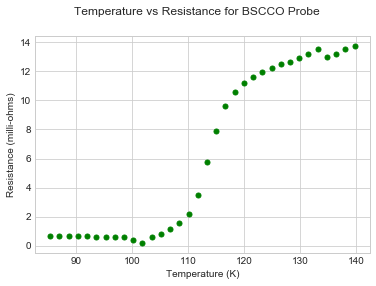

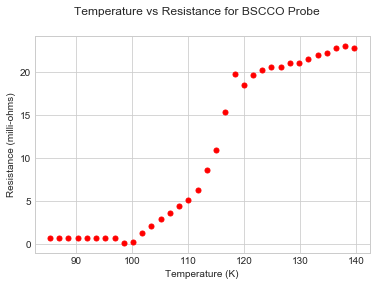

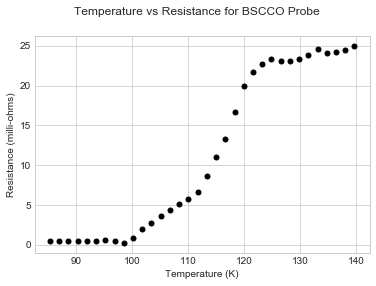

In [141]:
plt.figure(1)
plt.errorbar(temperature, np.absolute(resistance_012), yerr = 0, fmt = "bo", markersize = "5", linewidth=3)
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance for BSCCO Probe")

plt.figure(2)
plt.errorbar(temperature, np.absolute(resistance_021), yerr = 0, fmt = "go", markersize = "5", linewidth=3)
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance for BSCCO Probe")

plt.figure(3)
plt.errorbar(temperature, np.absolute(resistance_033), yerr = 0, fmt = "ro", markersize = "5", linewidth=3)
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance for BSCCO Probe")

plt.figure(4)
plt.errorbar(temperature, np.absolute(resistance_042), yerr = 0, fmt = "ko", markersize = "5", linewidth=3)
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance for BSCCO Probe")

In [134]:
# From the graph, we see the midpoint of the step change in resistance for current of 0.12 corresponds to a temperature of 118 K
# This is an approximation for the critical temperature of the BSCCO probe

# Start Working Here!

Text(0.5, 0.98, 'Current vs Temperature for BSCCO Probe')

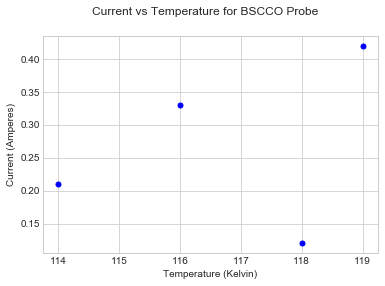

In [143]:
current = np.array([0.12, 0.21, 0.33, 0.42])
critical_temp = np.array([118, 114, 116, 119])

plt.figure(5)
plt.errorbar(critical_temp, current, yerr = 0, fmt = "bo", markersize = "5", linewidth=3)
plt.ylabel('Current (Amperes)')
plt.xlabel('Temperature (Kelvin)')
plt.suptitle("Current vs Temperature for BSCCO Probe")